# Time Domain vs Frequency Domain Tutorial


---

*A quick note before you start*: Follow the [link to NBviewer](https://nbviewer.jupyter.org/github/michellejw/timeseries/blob/master/TDvsFD.ipynb) for a full page view of this notebook, or check out the [Binder Page](https://mybinder.org/v2/gh/michellejw/timeseries/master?filepath=TDvsFD.ipynb) to access an online interactive version. You can access the Github repo [here](https://github.com/michellejw/timeseries).

---

## What's in this tutorial?
The purpose of this tutorial is to provide an overview of the concept of the time domain and frequency domain representations of signals. You'll get a feel for what those two domains are useful for, and you also get a bunch of handy dandy Python code so you can go off into the world and process your own datasets! Think of it as a tutorial PLUS a toolbox. 

There's a very specific type of data we're going to talk about here, and that's time series data. That means that the data are made up of a series of samples at equally spaced time intervals. Here are some examples of time series data:

* sound waves
* temperature
* ocean tides
* rainfall
* also non-environmental things like daily currency exchange rates

<!-- Here's how you embed an image in Markdown using html syntax -->
<img align="left" src="https://michw.com/IMAGES/singer-withtext-400px.png">

## Time Domain

We're going to start with a quick look at the wonders of the time domain! And the best way to do that is to jump right into examples of that representation. 

In [2]:
# First we'll import all the libraries we'll need to do the rest of the tutorial
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.io.wavfile as wf

First we'll construct a sinusoid as an example:

In [7]:
F = 2 # frequency in Hz
fs = 50 # sample rate in Hz
A = 1 # Amplitude
duration = 2
tvec = np.arange(0.,duration,1/fs) # time vector
sig1 = np.sin(2*np.pi*F*tvec) # sine wave

... and plot that sinusoid, yeah!

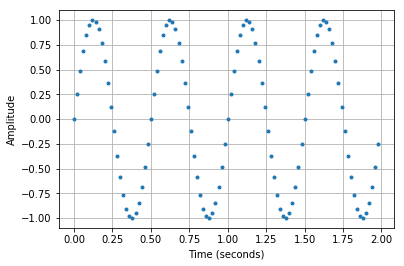

In [8]:
plt.plot(tvec,sig1,'.')
plt.grid()
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

In the plot above, each dot is a data point. The sine wave has a frequency of 2 Hz (or, 2 cycles per second). That sine wave is sampled 50 times every second, which is also known as the sample rate. 

This way of looking at the data, with time on the x-axis, and amplitude on the y-axis, is also known as the **time domain representation**. It's a bit boring just looking at a sinusoid, so let's have a look at a snippet of music from one of my favorite movies. (This is just a snippet but you can listen to the whole song on Youtube [here](https://youtu.be/AFa1-kciCb4)) 

In [63]:
# This function reads the wav file, and assigns teh signal to the "dat" 
# variable, and the sample rate to the "fs" variable
# (The file was downloaded from https://en.wikipedia.org/wiki/The_Good,_the_Bad_and_the_Ugly_(theme))
wavfile = 'good-bad-ugly-8k.wav'
fs, dat = wf.read(wavfile)

# Now let's build a time vector so we can plot it. The sound file duration (in seconds) 
# is computed from the number of samples divided by the sample rate
duration = len(dat)/fs 
tvec = np.linspace(0,duration,len(dat))

Text(0.5,1,'Time Domain representation of a sound recording')

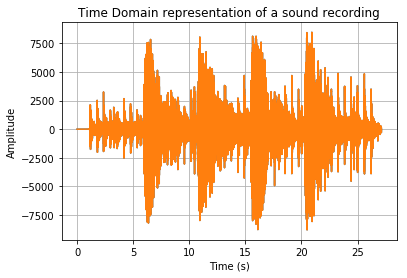

In [65]:
plt.plot(tvec,dat)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain representation of a sound recording')

And there we have it - a lovely **Time Domain** representation of a sound recording. You can see some interesting things here. For example, the recording starts off pretty quietly, has a louder part in the middle, and then ends fairly quietly again. You can see four higher amplitude sections, around 6 seconds, 11 seconds, 16 seconds, and 21 seconds.

**But what if you want MORE?**
<img align="left" src="https://michw.com/IMAGES/moar-biden.jpg">



## Frequency Domain

You know this is a sound recording. But you might be wondering if there are high frequencies or low frequencies or harmonics or any of that good stuff. As you might have guessed, that is where the **Frequency Domain** comes into play. 
